## Naïve Bayes from Scratch - Bag of Words ##


In [1]:

#IPython is what you are using now to run the notebook
import IPython
print( "IPython version:      %6.6s (need at least 1.0)" % IPython.__version__)

# Numpy is a library for working with arrays and matrices
import numpy as np
print( "Numpy version:        %6.6s (need at least 1.7.1)" % np.__version__)

# SciPy implements many different numerical algorithms
import scipy as sp
print( "SciPy version:        %6.6s (need at least 0.12.0)" % sp.__version__)

# Pandas makes working with data tables easier
import pandas as pd
print( "Pandas version:       %6.6s (need at least 0.11.0)" % pd.__version__)

# Module for plotting
import matplotlib.pyplot as plt  
from pylab import *
print( "Mapltolib version:    %6.6s (need at least 1.2.1)" %
       matplotlib.__version__)
%matplotlib inline
# necessary for in-line graphics

# SciKit Learn implements several Machine Learning algorithms
import sklearn
print( "Scikit-Learn version: %6.6s (need at least 0.13.1)" %
       sklearn.__version__)
import os
# for certain system-related functions


import nltk
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score 


IPython version:       7.8.0 (need at least 1.0)
Numpy version:        1.16.5 (need at least 1.7.1)
SciPy version:         1.3.1 (need at least 0.12.0)
Pandas version:       0.25.1 (need at least 0.11.0)
Mapltolib version:     3.1.1 (need at least 1.2.1)
Scikit-Learn version: 0.21.3 (need at least 0.13.1)


### 1. Explore and clean the data
#### First, let's load data and take a closer look at it.
#### 1. Take a look at a few lines of data (you may use pd.sample for this).

In [2]:
#loading the data
rotten_tomatoe = pd.read_csv("C:\\Users\\Subhiksha\\Desktop\\574\\rotten-tomatoes.csv\\rotten-tomatoes.csv" , sep = ',')

In [3]:
# looking at 10 random lines of the dataset
rotten_tomatoe.sample(10)

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
12022,Variety Staff,fresh,80453,http://www.variety.com/review/VE1117789400.htm...,Variety,Their romance is enhanced by Nestor Almendros'...,2008-07-22 00:00:00,14153,The Blue Lagoon
2172,Brian Lowry,rotten,109891,http://www.variety.com/review/VE1117902805.htm...,Variety,Neither Macaulay Culkin nor Ted Danson has imp...,2010-07-06 00:00:00,12618,Getting Even With Dad
5002,Variety Staff,fresh,80455,http://www.variety.com/review/VE1117789404.htm...,Variety,"Given all the chaos, director and, with Aykroy...",2008-04-01 00:00:00,13659,The Blues Brothers
3113,Kenneth Turan,fresh,117998,http://www.calendarlive.com/movies/reviews/cl-...,Los Angeles Times,An expert in making audiences squirm and twist...,2001-02-14 00:00:00,12652,Twister
1150,James Berardinelli,rotten,269347,http://www.reelviews.net/movies/h/hunted2003.html,ReelViews,This is schlock -- by-the-numbers action that ...,2003-03-16 00:00:00,13646,The Hunted
11476,Desson Thomson,rotten,116477,http://www.washingtonpost.com/wp-srv/style/lon...,Washington Post,There are many ... instances when you want to ...,2002-09-25 00:00:00,12690,Hamlet
1054,NaN,none,96316,http://www.timeout.com/film/reviews/79853/tuck...,Time Out,The cinematic sleight-of-hand parallels the bo...,2006-02-09 00:00:00,10430,Tucker: The Man and His Dream
10661,Eleanor Ringel Gillespie,rotten,162973,http://www.accessatlanta.com/movies/content/sh...,Atlanta Journal-Constitution,The movie bravely goes where too many other fi...,2004-02-21 00:00:00,13672,Get Real
6937,Stephen Holden,fresh,118901,http://movies.nytimes.com/movie/review?res=9A0...,New York Times,...the performances are juicy and intelligent.,2000-01-01 00:00:00,15672,Critical Care
8365,James Berardinelli,fresh,97757,http://www.reelviews.net/php_review_template.p...,ReelViews,A fantastic success.,2008-06-10 00:00:00,9373,The Little Mermaid 3D


#### 2. print out all variable names.

In [4]:
#printing out all variable names.
rotten_tomatoe.columns

Index(['critic', 'fresh', 'imdb', 'link', 'publication', 'quote',
       'review_date', 'rtid', 'title'],
      dtype='object')

#### 3. Create a summary table (maybe more like a bullet list) where you print out the most important summary statistics for the most interesting variables. The most interesting facts you should present should include: 
* a) number of missings for fresh and quote; 
* b) all different values for fresh/rotten evaluations; 
* c) counts or percentages of these values; 
* d) number of zero-length or only whitespace quotes; 
* e) minimum-maximum-average length of quotes (either in words, or in characters). (Can you do this as an one-liner?); 
* f) how many reviews are in data multiple times. Feel free to add more figures you consider relevant.

**a) number of missings for fresh and quote;**

In [5]:
# Looking at the missing values in the column fresh and quote
print("Missing values in column fresh ", rotten_tomatoe['fresh'].isnull().sum())
print("Missing values in  column quote ", rotten_tomatoe['quote'].isnull().sum())

Missing values in column fresh  0
Missing values in  column quote  0


**b) all different values for fresh/rotten evaluations;**

In [6]:
# Looking for different values for fresh/rotten evaluation
rotten_tomatoe['fresh'].unique()

array(['fresh', 'rotten', 'none'], dtype=object)

In [7]:
# dropping the rows with value 'none'
rotten_tomatoe.drop(rotten_tomatoe[rotten_tomatoe['fresh'] == "none"].index, inplace = True) 


**c) counts or percentages of these values;**

In [8]:
print("Count of unique values in the column fresh")
print("\n")
print(rotten_tomatoe['fresh'].value_counts())

Count of unique values in the column fresh


fresh     8389
rotten    5030
Name: fresh, dtype: int64


**d) number of zero-length or only whitespace quotes;**

In [42]:
# Looking for number of zero length or only whitespaces in the quote column 

val1 = rotten_tomatoe['quote'].astype(str).str.isspace().sum()
print(" Number of whitespaces : " , val1 )


 Number of whitespaces :  0


**e) minimum-maximum-average length of quotes (either in words, or in characters). (Can you do this as an one-liner?);**

In [13]:
#RT_df.columns[RT_df.isna().any()].tolist()
# field_length = RT_df.quote.astype(str).map(len)
# print (RT_df['quote'].loc[field_length.argmin()])

print('The minimum length of quotes is : ' +str(rotten_tomatoe['quote'].str.len().min()) + ', the maximum length of quotes is  ' + str(rotten_tomatoe['quote'].str.len().max()) + ' and the average length of quotes is ' +  str(rotten_tomatoe['quote'].str.len().mean()))

The minimum length of quotes is : 4, the maximum length of quotes is  256 and the average length of quotes is 121.24569640062597


**f) how many reviews are in data multiple times. Feel free to add more figures you consider relevant.**

In [10]:
# how many reviews are in data multiple times

# keep first duplicate row
result_df = rotten_tomatoe.drop_duplicates()
result_df.shape[0]

print(" Number of reviews having data multiple times : " , rotten_tomatoe.shape[0] - result_df.shape[0])


 Number of reviews having data multiple times :  596


#### 4. Now when you have an overview what you have in data, clean it by removing all the inconsistencies the table reveals. We have to ensure that the central variables, quote and fresh are not missing, quote is not an empty string (or just contain spaces and such), and all rows are unique.
#### I recommend to do it as a standalone function so you can use the same function for another similar dataset (such as test data).

In [15]:
# standalone function
def CheckInconsistency (dataset,variable1, variable2):
    # check if variable 1 and variable 2 are not missing.
    #print(variable1)
    if ((dataset[variable1].isna().sum()>0 ) | (dataset[variable1].isnull().sum()>0) |(dataset[variable2].isna().sum()>0 )|(dataset[variable2].isnull().sum()>0)):
        print('There are inconsistencies. hence dropping the null and NA values.')
        dataset=dataset[variable1].dropna()
        dataset=dataset[variable2].dropna()
    else:
        print('There are no inconsistencies in '+ variable1 + ' and ' + variable2 + ' columns')
    
    #check if quote is not an empty string
    if ((dataset[variable1].empty == True) | ((dataset[variable1]== '').sum()>0) | (dataset[variable1].astype(str).str.isspace().sum())):
        print('There are empty syring values ')
        
        a=dataset[dataset[variable1]==''].index
        dataset.drop(dataset.index(a))
    else:
        print('There are no empty values ')
    
    #Drop the duplicate values
    
    # keep first duplicate row
    dataset = dataset.drop_duplicates()

In [16]:
CheckInconsistency(result_df,'quote','fresh')


There are no inconsistencies in quote and fresh columns
There are no empty values 


##  2. Naïve Bayes

#### Now where you are familiar with the data, it's time to get serious and implement the Naive Bayes classifier from scratch. But first things first.
#### 1. Ensure you are familiar with Naive Bayes. Consult the readings, available on canvas. Schutt & O'Neill is an easy and accessible (and long) introduction, Whitten & Frank is a lot shorter but still accessible introduction. The Lecture notes contains examples how to create baf-of-words (BOW), and how to compute Naive Bayes classifier using BOW-s.


**ANSWER:**

On inspecting the data, and before we create bag-of-words, we see that in our predictor variable (column 'quote'), apart from the actual text that we require for examining and prediction, there are punctuation marks, stopwords (such as a, the , etc), and numeric values which can be ommited out of the data, for better prediction. Hence, we create a function to remove those words from any dataset, in other words implement pre processing on our data.

In [11]:
# splitting the data into train and test
index = int(0.8 * len(result_df))
df_train = result_df[:index]
df_test = result_df[index:]


In [12]:
#Text Pre-processing 

def preprocessingText(result_df):
    
    #converting the text to lowercase for uniformity.
    result_df['quote'] = ( result_df['quote'].apply(lambda x: " ".join(x.lower() for x in x.split()))) # everything to lowercase
    # removes punctuation
    result_df['quote'] =  result_df['quote'].str.replace('[^\w\s]','') 
    
    nltk.download('stopwords')
    
    # Remove stop words
    stop = stopwords.words('english')
    result_df['quote'] =  result_df['quote'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
            
#     from string import punctuation
#     for i in range(len(result_df)):
#         result_df['quote'] = ' '.join(word.strip(punctuation) for word in result_df[i]['quote'].split() if word.strip(punctuation))
#         #z.append(z)
    
    
    return  result_df
   
# 

In [13]:
# processed text.
Finaldf_train = preprocessingText(df_train)
Finaldf_train.head(5)

C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subhiksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is try

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,http://www.timeout.com/film/reviews/87745/toy-...,Time Out,ingenious concept design execution could watch...,2009-10-04 00:00:00,9559,Toy Story
1,Richard Corliss,fresh,114709,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,years inventive comedy,2008-08-31 00:00:00,9559,Toy Story
2,David Ansen,fresh,114709,http://www.newsweek.com/id/104199,Newsweek,winning animated feature something everyone ag...,2008-08-18 00:00:00,9559,Toy Story
3,Leonard Klady,fresh,114709,http://www.variety.com/review/VE1117941294.htm...,Variety,film sports provocative appealing story thats ...,2008-06-09 00:00:00,9559,Toy Story
4,Jonathan Rosenbaum,fresh,114709,http://onfilm.chicagoreader.com/movies/capsule...,Chicago Reader,entertaining computergenerated hyperrealist an...,2008-03-10 00:00:00,9559,Toy Story


#### 2. Convert your data (quotes) into bag-of-words.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True)
# define vectorizer
X = vectorizer.fit_transform( Finaldf_train.quote.values)
# vectorize your data. Note: this creates a sparce matrix,
# use .toarray() if you want a dense matrix.
words = vectorizer.get_feature_names()
# in case you want to see what are the actual words
words1 = pd.DataFrame(X.toarray(), columns=words)
words1['fresh'] =  Finaldf_train['fresh']


In [21]:
#vectorized data
words1.head(10)

,0014,007,007s,044the,07,10,100,1000,100plus,101,...,zooming,zooms,zorro,zorros,zowie,zucker,zweibel,zwick,zwicks,zzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Removing columns having numeric names 
df2 = words1.columns.get_values().tolist()
df2 = [i for i in df2 if i.isalpha()]
words1 = words1.loc[: , df2]

C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


#### 3. Split your work data and target (i.e. the variable fresh) into training and validation chunks (80/20 or so).

**ANSWER:**
    
We have split the data into train and validation set in the first step  

#### 4. Compute the unconditional (log) probability that the tomato is fresh/rotten, log Pr(F), and log Pr(R).

#### These probabilities are based on the values of fresh alone, not on the words the quotes contain.

In [16]:
# unconditional (log) probability that the tomato is fresh

logP_F = np.log(sum(words1.fresh == 'fresh')/len(words1))
logP_F

-0.5054459562562571

In [17]:
# unconditional (log) probability that the tomato is rotten

logP_R = np.log(sum(words1.fresh == 'rotten')/len(words1))
logP_R

-1.0265047563022767

#### 5. For each word w, compute log Pr(wjF) and log Pr(wjR), the (log) probability that the word is present in a fresh/rotten review. These probabilities can easily be calculated from counts of how many times these words are present for each class. Hint: these computations are based on your BOW-s X. Look at ways to sum along columns in this matrix.

In [18]:
# log Pr(wjF)
# Probability of a word in a sentence(each row) given it is fresh 
fresh = words1.apply(lambda x: np.log((sum(x == 1) & sum(words1.fresh == 'fresh')) / sum(words1.fresh == 'fresh')), axis=0)


C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [19]:
# dropping the infinity values
fresh = fresh.replace([np.inf, -np.inf], np.nan).dropna()

# Converting log Pr(wjF) into a dictionary for key value pair, where the pair represents each word and its log probability.
fresh = fresh.to_dict()

In [20]:
# log Pr(wjR)
# Probability of a word in a sentence(each row) given it is rotten 
rotten = words1.apply(lambda x: np.log(sum((x == 1) & (words1.fresh == 'rotten')) / sum(words1.fresh == 'rotten')), axis=0)

C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [21]:
# dropping the infinity values
rotten = rotten.replace([np.inf, -np.inf], np.nan).dropna()
# Converting log Pr(wjR) into a dictionary for key value pair, where the pair represents each word and its log probability.
rotten = rotten.to_dict()

#### 6. For both destination classes, F and R, compute the log-likelihood that the quote belongs to this class. log-likelihood is what is given inside the brackets in equation (1) on slide 28, and the equations on Schutt "Doing Data Science", page 102. In lecture notes it is explained before the email classification example (and in the example too). 

#### Computing these likelihoods involves sums of the previously computed probabilities, log Pr(wjF), and BOW elements xij. Check out np.apply_along_axis that can be used to apply a function on matrix columns/rows so you can create a fairly good one-liner to compute log-likelihood. Loops are fine too if apply seems too complex, just slower and less compact. Based on the log-likelihoods, predict the class F or R for each quote in the validation set.

In [22]:
# function for prediction

def lets_predict_fresh(row):
    ans = 0
    string1 = []
    string1.append(row)
    z = string1[0].split()

    for x in range(len(z)):
        ans = ans + fresh.get(z[x],0)
        
    return (ans + logP_F)

def lets_predict_rotten(row):
    ans = 0
    string1 = []
    string1.append(row)
    z = string1[0].split()
    
    for x in range(len(z)):
        ans = ans + rotten.get(z[x],0)
       
    return (ans + logP_R)

In [23]:
#The log-likelihood that the quote belongs to fresh
df_test['predicted_for_fresh'] = df_test['quote'].apply(lambda row : lets_predict_fresh(row))
#The log-likelihood that the quote belongs to rotten
df_test['predicted_for_rotten'] = df_test['quote'].apply(lambda row : lets_predict_rotten(row))


C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [24]:
#Based on the log-likelihoods, predicting the class F or R for each quote in the validation set.

# Predicted Final
df_test['predicted_final'] = np.where(df_test['predicted_for_fresh'] > df_test['predicted_for_rotten'], 'fresh' , 'rotten' )

C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


#### 7. Print the resulting confusion matrix and accuracy (feel free to use existing libraries).

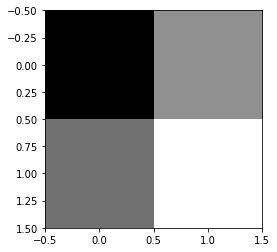

In [32]:
# Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(df_test['fresh'], df_test['predicted_final'])
plt.imshow(conf, cmap='binary', interpolation='None')
plt.show()

In [25]:
# Cross tabulation of the data.
pd.crosstab(df_test['fresh'], df_test['predicted_final'], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,fresh,rotten,All
True,,,
fresh,951,603,1554
rotten,675,336,1011
All,1626,939,2565


In [26]:
from sklearn.metrics import accuracy_score 

print("Hence accuracy is ", accuracy_score(df_test['fresh'], df_test['predicted_final']) )

Hence accuracy is  0.5017543859649123


## 3. Interpretation

#### Now it is time to look at your fitted model a little bit closer. NB model probabilities are rather easy to understand and interpret. The task here is to find the best words to predict a fresh, and a rotten review. And we only want to look at words that are reasonably frequent, say more frequent than 30 times in the data.

#### 1. Extract from your conditional probability vectors log Pr(wjF) and log Pr(wjR) the probabilities that correspond to frequent words only.

In [35]:
# considering only "fresh" words
fresh_words = words1[words1['fresh'] == 'fresh']
fresh_words = fresh_words.drop(['fresh'], axis=1)

# calculating the frequency of the words for fresh
fresh_words_sum = fresh_words.sum(axis = 0)

# sorting the frequency values of the words in descending order
freq_word_fresh = fresh_words_sum.sort_values(ascending=False)
fresh_review = pd.DataFrame(freq_word_fresh.head(30))
fresh_review.rename(columns = {0: 'freq'}, inplace = True)
fresh_review = fresh_review.reset_index().rename(columns = {'index' : 'words'})

In [36]:
# considering only "rotten" words
rotten_words = words1[words1['fresh'] == 'rotten']
rotten_words = rotten_words.drop(['fresh'], axis=1)

# calculating the frequency of the words for rotten
rotten_words_sum = rotten_words.sum(axis = 0)

# sorting the frequency values of the words in descending order
freq_word_rotten = rotten_words_sum.sort_values(ascending=False)
rotten_review = pd.DataFrame(freq_word_rotten.head(30))
rotten_review.rename(columns = {0: 'freq'}, inplace = True)
rotten_review = rotten_review.reset_index().rename(columns = {'index' : 'words'})


In [37]:
#Computing the probabilities that correspond to the words with the highest frequency only for Rotten
highprob_rotten=[]
highprob_rotten_word = []
for x in range(len(rotten_review['words'])):
    highprob_rotten.append(rotten.get(rotten_review.iloc[x]['words'],0)) 
    highprob_rotten_word.append(rotten_review['words'][x])
    
rotten_high_final = pd.DataFrame(highprob_rotten_word , highprob_rotten).reset_index()
rotten_high_final = rotten_high_final.rename(columns = {'index' : 'freq' , 0 : 'words'})

In [38]:
# Computing the probabilities that correspond to the words with the highest frequency only for Fresh
highprob_fresh=[]
highprob_fresh_word = []
for x in range(len(fresh_review['words'])):
    highprob_fresh.append(fresh.get(fresh_review.iloc[x].words,0))
    highprob_fresh_word.append(fresh_review['words'][x])
    
fresh_high_final = pd.DataFrame(highprob_fresh_word , highprob_fresh).reset_index() 
fresh_high_final = fresh_high_final.rename(columns = {'index' : 'freq' , 0 : 'words'})

#### 2. Find 10 best words to predict F and 10 best words to predict R. Hint: imagine we have a review that contains just a single word. Which word will give the highest weight to the probability the review is fresh? Which one to the likelihood it is rotten?
#### Comment your results.

**ANSWER:**
    
The frequent words - "time, story, much, and even" have the log probabilities 0, which give them the highest weight to the probability that the review is fresh. 

The frequent word "movie" has the log probability 0, which gives it the highest weight to the probability that the review if rotten

In [39]:
# 10 best words for fresh 
best_ten_fresh = fresh_high_final.sort_values(by = 'freq' , ascending=False).head(10)
best_ten_fresh


,freq,words
11,0.000000,time
4,0.000000,story
6,0.000000,much
7,0.000000,even
8,-7.135826,movies
13,-7.135826,characters
3,-7.135826,like
23,-7.273329,work
16,-7.273329,made
25,-7.425332,little


In [40]:
# 10 best words for rotten
best_ten_rotten = rotten_high_final.sort_values(by = 'freq' , ascending=False).head(10)
best_ten_rotten


,freq,words
0,-2.837904,movie
1,-2.915751,film
2,-3.595601,one
3,-4.143089,like
4,-4.624360,good
5,-4.634075,story
6,-4.643856,comedy
7,-4.673604,much
8,-4.683657,even
9,-4.745496,movies


#### 3. Print out a few missclassified quotes. Can you understand why these are misclassified?

In [41]:
# Cross tabulation of the data.
pd.crosstab(df_test['fresh'], df_test['predicted_final'], rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,fresh,rotten,All
True,,,
fresh,951,603,1554
rotten,675,336,1011
All,1626,939,2565


In [42]:
# created a misclassfication table where the actual value for fresh and rotten is different from our predicted value. 
df_misclassification=df_test[(df_test.fresh)!=(df_test.predicted_final)].copy()

In [43]:
df_misclassification.head(5)

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title,predicted_for_fresh,predicted_for_rotten,predicted_final
10667,Dennis Lim,rotten,162973,http://www.villagevoice.com/issues/9917/lim2.php,Village Voice,"Wilde's script, which has a weakness for mild,...",2000-01-01 00:00:00,13672,Get Real,-30.930014,-32.104628,fresh
10668,James Berardinelli,fresh,162973,http://www.reelviews.net/movies/g/get_real.html,ReelViews,"In Steven, John, and their friends, Shore give...",2000-01-01 00:00:00,13672,Get Real,-70.726082,-61.707762,rotten
10669,Manny Farber,rotten,37913,http://www.tnr.com/article/film/91917/tnr-film...,The New Republic,"The production, mainly because of Michael Curt...",2012-08-31 00:00:00,19975,Mildred Pierce,-29.345052,-30.256631,fresh
10670,NaN,rotten,37913,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,All this is good melodrama and fair entertainm...,2011-07-25 00:00:00,19975,Mildred Pierce,-24.930014,-38.554595,fresh
10672,Variety Staff,fresh,37913,http://www.variety.com/review/VE1117793121.htm...,Variety,"A class feature, showmanly produced by Jerry W...",2007-10-17 00:00:00,19975,Mildred Pierce,-29.345052,-25.882236,rotten


## 4. NB with smoothing

#### So, now you have your brand-new NB algorithm up and running. As a next step, we add smoothing to it . As our task is to find the best smoothing parameter below, your first task is to mold what you did above into two funcions: one for fitting and another one for predicting.

#### 1. Create two functions: one for fitting NB model, and another to predict outcome based on the fitted model. As mentioned above, the model is fully described with 4 probabilities, so your fitting function may return such a list as the model; and the prediction function may take it as an input.

In [27]:
# creating a function for pre-processing
def preprocessingText1(rotten_tomatoe):

    result_df = rotten_tomatoe.drop_duplicates()

    result_df['quote'] = ( result_df['quote'].apply(lambda x: " ".join(x.lower() for x in x.split()))) # everything to lowercase
    result_df['quote'] =  result_df['quote'].str.replace('[^\w\s]','') # Removes Punctuation
    
    nltk.download('stopwords')
    
    # Remove stop words
    stop = stopwords.words('english')
    result_df['quote'] =  result_df['quote'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
    
    vectorizer = CountVectorizer(binary=True)
    # define vectorizer
    X = vectorizer.fit_transform( result_df.quote.values)
    # vectorize your data. Note: this creates a sparce matrix,
    # use .toarray() if you want a dense matrix.
    words = vectorizer.get_feature_names()
    # in case you want to see what are the actual words
    words1 = pd.DataFrame(X.toarray(), columns=words)
    words1['fresh'] =  result_df['fresh']
    
    df2 = words1.columns.get_values().tolist()
    df2 = [i for i in df2 if i.isalpha()]
    words1 = words1.loc[: , df2]
    
    
    return  words1

In [28]:
words1 = preprocessingText1(df_train)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Subhiksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.


In [29]:
# Created a function to fit the NB model which gives the output as the 4 probabilities

def fit(words1, alpha):
    
    logP_F = np.log((sum(words1.fresh == 'fresh') + alpha)  / (len(words1) + alpha))
    print("Probability of fresh is ", logP_F)
    
    logP_R = np.log((sum(words1.fresh == 'rotten') + alpha) / (len(words1) + alpha))
    print("Probability of rotten is ", logP_R)
    
    a = sum(words1.fresh == 'fresh')
    b = sum(words1.fresh == 'rotten')

    # Probability of a word in a sentence(each row) given it is fresh 
    #fresh = words1.apply(lambda x: np.log2((sum(x == 1) & sum(words1.fresh == 'fresh') + alpha) / (a + alpha)), axis=0)
    fresh = words1.apply(lambda x: np.log((sum((x == 1) & (words1.fresh == 'fresh')) + alpha) / (a + alpha)), axis=0)
    fresh = fresh.replace([np.inf, -np.inf], np.nan).dropna()
    fresh = fresh.to_dict()
    
    
    #rotten = words1.apply(lambda x: np.log2((sum(x == 1) & sum(words1.fresh == 'rotten') + alpha) / (b + alpha)), axis=0)
    rotten = words1.apply(lambda x: np.log((sum((x == 1) & (words1.fresh == 'rotten')) + alpha) / (a + alpha)), axis=0)

    rotten = rotten.replace([np.inf, -np.inf], np.nan).dropna()
    rotten = rotten.to_dict()
    
    return logP_F, logP_R, fresh, rotten

In [30]:
# creating a function to predict the outcome based on the fitted model.

# prediction for fresh
def lets_predict_fresh(row):
    ans = 0
    string1 = []
    string1.append(row)
    z = string1[0].split()

    for x in range(len(z)):
        ans = ans + fresh.get(z[x],0)
        
    return (ans + logP_F)

# prediction for rotten
def lets_predict_rotten(row):
    ans = 0
    string1 = []
    string1.append(row)
    z = string1[0].split()
    
    for x in range(len(z)):
        ans = ans + rotten.get(z[x],0)
       
    return (ans + logP_R)

#### 2. Add smoothing to the model. See Schutt p 103 and 109. Smoothing amounts to assuming that we have "seen" every possible word alpha > 0 times already, for both classes. (If you wish, you can also assume you have seen the words alpha times for F and beta times for R). Note that alpha does not have to be an integer, and typically the best alpha < 1.

**ANSWER:**

**Adding smoothing to the model by passing Alpha = 0**

In [31]:
# 
logP_F, logP_R, fresh, rotten = fit(words1, 0)

Probability of fresh is  -0.5054459562562571
Probability of rotten is  -1.0265047563022767


C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


In [105]:
# assigning the probability values to the column predicted_for_fresh
df_test['predicted_for_fresh'] = df_test['quote'].apply(lambda row : lets_predict_fresh(row))

# assigning the probability values to the column predicted_for_rotten
df_test['predicted_for_rotten'] = df_test['quote'].apply(lambda row : lets_predict_rotten(row))


C:\Users\Purba\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Purba\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [106]:
# Creating a column predicted_final which compares the probability of both fresh and rotten, 
# and assigns the respective output (fresh/rotten) for each row
df_test['predicted_final'] = np.where(df_test['predicted_for_fresh'] > df_test['predicted_for_rotten'], 'fresh' , 'rotten' )

C:\Users\Purba\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [108]:
# calculating the accuracy
print("Hence accuracy is ", accuracy_score(df_test['fresh'], df_test['predicted_final']) )

Hence accuracy is  0.5017543859649123


**Adding smoothing to the model by passing Alpha = 0.2**

In [32]:
logP_F, logP_R, fresh, rotten = fit(words1, 0.2)

Probability of fresh is  -0.5054331329459061
Probability of rotten is  -1.0264698328022848


In [33]:
df_test['predicted_for_fresh'] = df_test['quote'].apply(lambda row : lets_predict_fresh(row))
df_test['predicted_for_rotten'] = df_test['quote'].apply(lambda row : lets_predict_rotten(row))


C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [34]:
df_test['predicted_final'] = np.where(df_test['predicted_for_fresh'] > df_test['predicted_for_rotten'], 'fresh' , 'rotten' )

#calculating the accuracy
print("Hence accuracy is ", accuracy_score(df_test['fresh'], df_test['predicted_final']) )

Hence accuracy is  0.6058479532163743


C:\Users\Subhiksha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
